# **Proyecto 1**

Integrantes:


*   Niño Pedraza Eduardo
*   Reyes Ramírez Raquel
*   Salas Cortés Emiliano

A continuación se hace una estimación de los valores de theta a lo largo del tiempo como función una función no constante, y se compara con la tasa forward y los rendimientos.

In [ ]:
#Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.interpolate import interp1d
import math

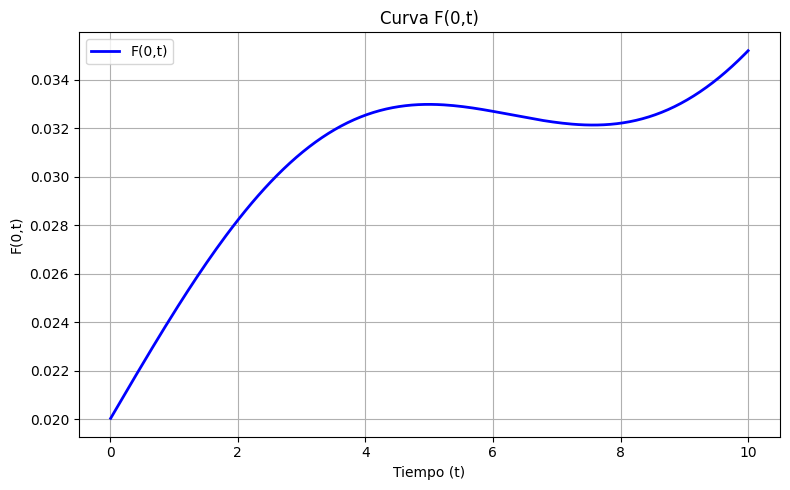

In [ ]:
# Tiempo y curva F(0,t)
tiempo = np.linspace(0.01, 10, 200)
F0_valores = 0.02 + 0.005 * np.sin(0.5 * tiempo) + 0.002 * tiempo
F_0_t = interp1d(tiempo, F0_valores, kind='cubic', fill_value="extrapolate")

# Derivada numérica de F(0,t)
dF0_dt_valores = np.gradient(F0_valores, tiempo)
dF0_dt = interp1d(tiempo, dF0_dt_valores, kind='cubic', fill_value="extrapolate")

# Gráfica de la curva F(0,t)
plt.figure(figsize=(8, 5))
plt.plot(tiempo, F_0_t(tiempo), label='F(0,t)', color='blue', linewidth=2)
plt.xlabel('Tiempo (t)')
plt.ylabel('F(0,t)')
plt.title('Curva F(0,t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Definición de la función θ(t)
def theta(t, a, sigma):
    return dF0_dt(t) + a * F_0_t(t) + (sigma**2) / (2 * a) * (1 - np.exp(-2 * a * t))

# Función de log-verosimilitud (negativa)
def log_verosimilitud(parametros, tiempo, tasas, F_0_t):
    a, sigma = parametros
    if a <= 0 or sigma <= 0:
        return np.inf
    media = F_0_t(tiempo) + (sigma**2 / (2 * a**2)) * (1 - np.exp(-a * tiempo))**2
    varianza = (sigma**2 / (2 * a)) * (1 - np.exp(-2 * a * tiempo))
    logL = -0.5 * np.sum(np.log(2 * np.pi * varianza) + ((tasas - media)**2) / varianza)
    return -logL


In [ ]:
# Escenarios de prueba
escenarios = [
    (1, 0.008),
    (0.01, 0.03),
    (0.5, 0.05),
    (1.0, 0.1),
    (2.0, 0.03)
]

puntos_iniciales = [
    [1200, 2000],
    [320, 500],
    [63, 89],
    [17, 12],
    [7, 5],
    [1, 1],
    [0.1, 0.3],
    [0.05, 0.01],
    [0, 0],
    [1, 1]
]

# Paso temporal
delta = tiempo[1] - tiempo[0]

In [ ]:
# Resultados a guardar
theta_estimadas = []
tasas_promedio_lista = []
parametros_estimados = []

# Estimación para cada escenario
for a_inicial, sigma_inicial in escenarios:
    print(f"\nProcesando con a={a_inicial}, sigma={sigma_inicial}")

    for j in range(100):
        theta_vals = theta(tiempo, a_inicial, sigma_inicial)

        # Simulación de 1000 trayectorias
        simulaciones = []
        for _ in range(1000):
            r = np.zeros_like(tiempo)
            r[0] = F_0_t(tiempo[0])
            for i in range(1, len(tiempo)):
                th = theta_vals[i-1]
                r[i] = r[i-1] + (th - a_inicial * r[i-1]) * delta + sigma_inicial * np.sqrt(delta) * np.random.normal()
            simulaciones.append(r)

        # Promedio de trayectorias
        tasas_promedio = np.mean(simulaciones, axis=0)

        punto_ini = puntos_iniciales[math.floor(j / 10)]

        resultado = minimize(
            log_verosimilitud, x0=punto_ini,
            args=(tiempo, tasas_promedio, F_0_t),
            method='L-BFGS-B', bounds=[(1e-5, None), (1e-5, None)]
        )
        a_estimado, sigma_estimado = resultado.x

        a_anterior, sigma_anterior = a_inicial, sigma_inicial

        np.random.seed(42)
        t_muestra = np.random.choice(tiempo, size=5, replace=False)

        theta_estimada = theta(t_muestra, a_estimado, sigma_estimado)
        theta_anterior = theta(t_muestra, a_anterior, sigma_anterior)
        F_muestra = F_0_t(t_muestra)

        error_nuevo = np.mean((theta_estimada - F_muestra)**2)
        error_viejo = np.mean((theta_anterior - F_muestra)**2)

        # Aceptación de nuevos parámetros si mejora el ajuste a F(0,t)
        if error_nuevo < error_viejo:
            a_inicial, sigma_inicial = a_estimado, sigma_estimado
        else:
            a_inicial, sigma_inicial = a_anterior, sigma_anterior

    print(f"Estimación final: â = {a_estimado:.4f}, σ̂ = {sigma_estimado:.4f}")

    # Resultados finales del escenario
    theta_final = theta(tiempo, a_inicial, sigma_inicial)
    parametros_estimados.append((a_estimado, sigma_estimado))
    theta_estimadas.append(theta_final)
    tasas_promedio_lista.append(tasas_promedio)


Procesando con a=1, sigma=0.008
	Iteración 1: inicio en [1200, 2000]
	Iteración 2: inicio en [1200, 2000]
	Iteración 3: inicio en [1200, 2000]
	Iteración 4: inicio en [1200, 2000]
	Iteración 5: inicio en [1200, 2000]
	Iteración 6: inicio en [1200, 2000]
	Iteración 7: inicio en [1200, 2000]
	Iteración 8: inicio en [1200, 2000]
	Iteración 9: inicio en [1200, 2000]
	Iteración 10: inicio en [1200, 2000]
	Iteración 11: inicio en [320, 500]
	Iteración 12: inicio en [320, 500]
	Iteración 13: inicio en [320, 500]
	Iteración 14: inicio en [320, 500]
	Iteración 15: inicio en [320, 500]
	Iteración 16: inicio en [320, 500]
	Iteración 17: inicio en [320, 500]
	Iteración 18: inicio en [320, 500]
	Iteración 19: inicio en [320, 500]
	Iteración 20: inicio en [320, 500]
	Iteración 21: inicio en [63, 89]
	Iteración 22: inicio en [63, 89]
	Iteración 23: inicio en [63, 89]
	Iteración 24: inicio en [63, 89]
	Iteración 25: inicio en [63, 89]
	Iteración 26: inicio en [63, 89]
	Iteración 27: inicio en [63, 89

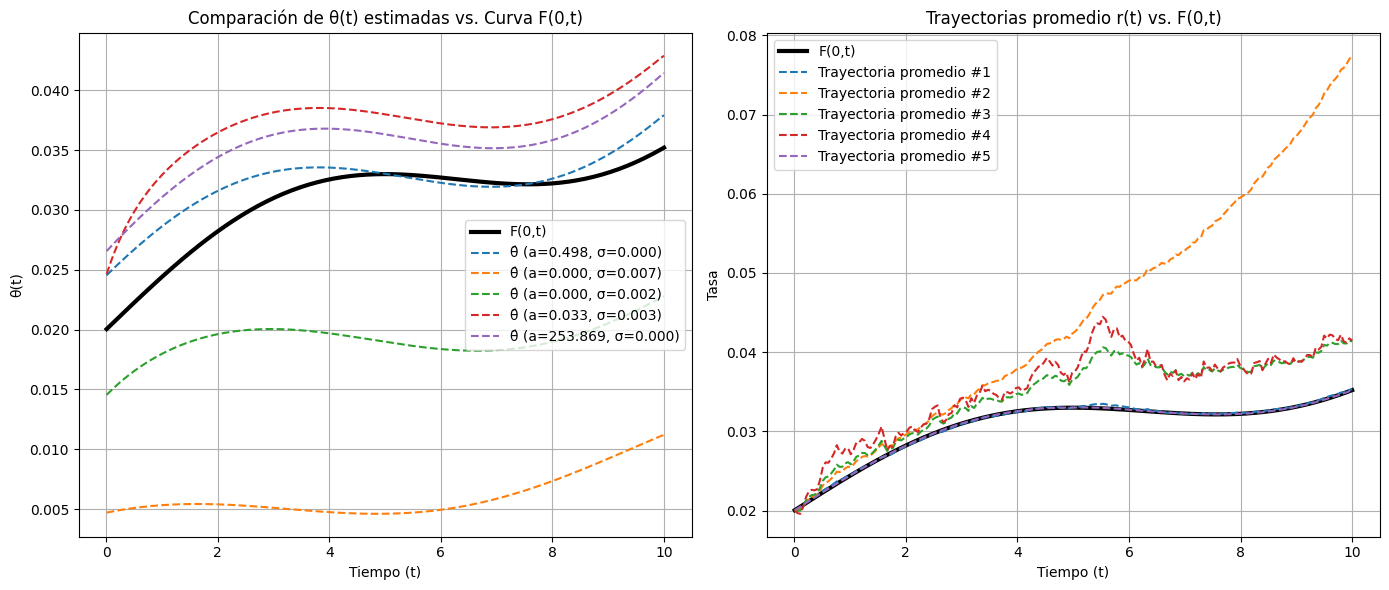

In [ ]:
# Gráficas comparativas
plt.figure(figsize=(14, 6))

# Comparación θ estimada vs F(0,t)
plt.subplot(1, 2, 1)
plt.plot(tiempo, F_0_t(tiempo), label='F(0,t)', linewidth=3, color='black')
for i, theta_est in enumerate(theta_estimadas):
    a_est, sigma_est = parametros_estimados[i]
    plt.plot(tiempo, theta_est, linestyle='--', label=f'θ̂ (a={a_est:.3f}, σ={sigma_est:.3f})')
plt.xlabel('Tiempo (t)')
plt.ylabel('θ(t)')
plt.title('Comparación de θ(t) estimadas vs. Curva F(0,t)')
plt.grid(True)
plt.legend()

# Comparación r_t promedio vs F(0,t)
plt.subplot(1, 2, 2)
plt.plot(tiempo, F_0_t(tiempo), label='F(0,t)', linewidth=3, color='black')
for i, r in enumerate(tasas_promedio_lista):
    plt.plot(tiempo, r, linestyle='--', label=f'Trayectoria promedio #{i+1}')
plt.xlabel('Tiempo (t)')
plt.ylabel('Tasa')
plt.title('Trayectorias promedio r(t) vs. F(0,t)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
